In [27]:
import os
import sys
#sys.path.insert(1, '../Src/')
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA
from umap import UMAP
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

PATH_DATA = '../../Data/'

%matplotlib inline

In [2]:
fname = "stringer_spontaneous.npy"
fname =os.path.join(PATH_DATA,fname)

In [3]:
# @title Data loading
dat = np.load(fname, allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'run', 'beh_svd_time', 'beh_svd_mask', 'stat', 'pupilArea', 'pupilCOM', 'xyz'])


# neural activity vs run

In [5]:
X = dat['sresp'].T
X.shape

(7018, 11983)

In [7]:
X[0]

array([ 2.9820833,  5.001608 ,  7.6890087, ..., 91.94794  ,  0.       ,
        1.1490179], dtype=float32)

In [8]:
y = dat['run']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train : ',X_train.shape)
print('Test  : ',X_test.shape)

Train :  (4912, 11983)
Test  :  (2106, 11983)


In [34]:
my_model_LR = LinearRegression()

In [35]:
my_model_LR.fit(X_train,y_train)

LinearRegression()

In [36]:
y_train_pred      = my_model_LR.predict(X_train)

metric_train_R2   = my_model_LR.score(X_train, y_train)
metric_train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False)

print("metric_train_R2  :",metric_train_R2)
print("metric_train_RMSE:",metric_train_RMSE)


metric_train_R2  : 0.9999999999297017
metric_train_RMSE: 7.524206390190874e-05


In [37]:
y_test_pred      = my_model_LR.predict(X_test)

metric_test_R2   = my_model_LR.score(X_test, y_test)
metric_test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False)

print("metric_test_R2  :",metric_test_R2)
print("metric_test_RMSE:",metric_test_RMSE)


metric_test_R2  : 0.6900353055654738
metric_test_RMSE: 4.857080565908912


## temporal split

In [39]:
n = int(len(X)*0.3)

X_train = X[:-n]
y_train = y[:-n]
X_test  = X[-n:]
y_test  = y[-n:]
print('Train : ',X_train.shape)
print('Test  : ',X_test.shape)

Train :  (4913, 11983)
Test  :  (2105, 11983)


In [40]:
my_model_LR_2 = LinearRegression()
my_model_LR_2.fit(X_train,y_train)

LinearRegression()

In [41]:
y_train_pred      = my_model_LR_2.predict(X_train)

metric_train_R2   = my_model_LR_2.score(X_train, y_train)
metric_train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False)

print("metric_train_R2  :",metric_train_R2)
print("metric_train_RMSE:",metric_train_RMSE)


metric_train_R2  : 0.9999999999260485
metric_train_RMSE: 6.538374209038597e-05


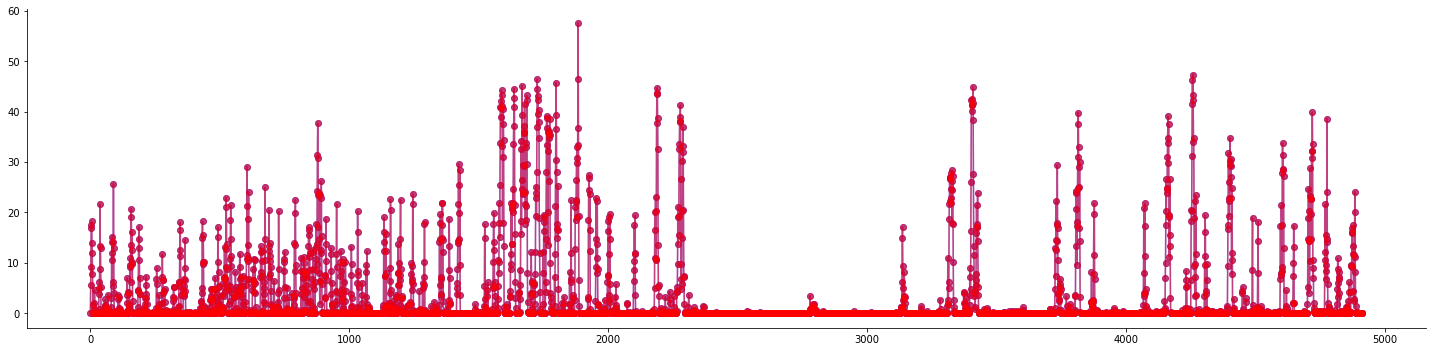

In [49]:
fig = plt.figure(figsize=(20,5))
plt.plot(range(len(y_train)),y_train,'-bo',alpha=0.5)
plt.plot(range(len(y_train_pred)),y_train_pred,'-ro',alpha=0.5)


In [42]:
y_test_pred      = my_model_LR_2.predict(X_test)

metric_test_R2   = my_model_LR_2.score(X_test, y_test)
metric_test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False)

print("metric_test_R2  :",metric_test_R2)
print("metric_test_RMSE:",metric_test_RMSE)


metric_test_R2  : 0.7701629839020971
metric_test_RMSE: 5.310470739370254


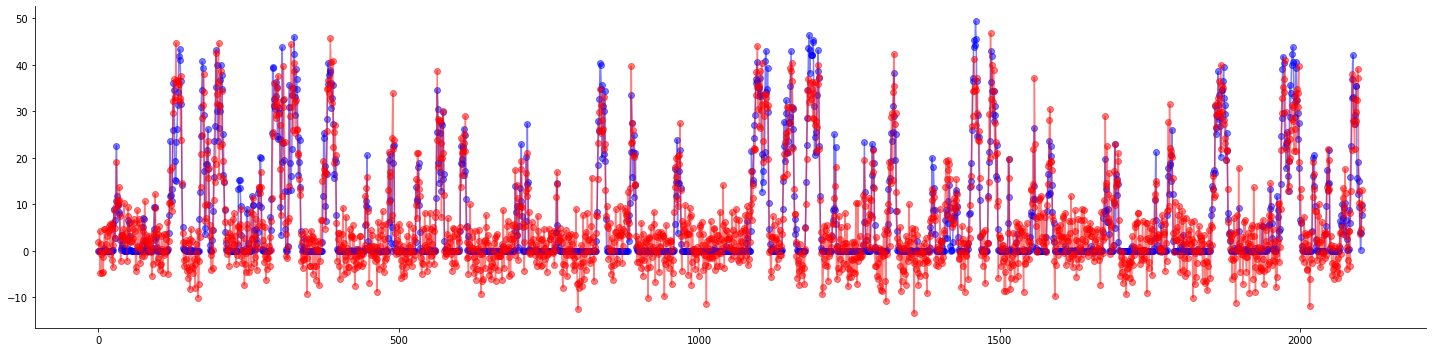

In [48]:
fig = plt.figure(figsize=(20,5))
plt.plot(range(len(y_test)),y_test,'-bo',alpha=0.5)
plt.plot(range(len(y_test_pred)),y_test_pred,'-ro',alpha=0.5)
